# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.metrics import confusion_matrix

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [4]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [5]:
# Define the target set y using the credit_ranking column
y = loans_df["credit_ranking"]

# Display a sample of y
y.sample

<bound method NDFrame.sample of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: credit_ranking, Length: 1599, dtype: int64>

In [6]:
# Define features set X by selecting all columns but credit_ranking
x = loans_df.drop(columns="credit_ranking", axis = 1)

# Review the features DataFrame
x.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Step 3: Split the features and target sets into training and testing datasets.


In [7]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((1199, 11), (400, 11), (1199,), (400,))

### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [8]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
scaler.fit(x_train)

# Fit the scaler to the features training dataset
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

x_train_scaled.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score
0,-0.567944,-1.180884,-0.192413,-0.171926,-0.457376,1.868533,0.747932,-0.451208,0.732496,-0.225539,-0.319157
1,-0.009410,0.800656,-0.041231,-0.322365,-0.069940,-0.453847,-0.085584,0.447799,-0.030161,-0.758447,-1.157834
2,2.336433,-0.845976,1.672160,0.053733,-0.134513,1.481470,0.809673,1.493156,-1.364809,0.425793,0.053588
3,0.214004,1.303018,-0.242807,-0.171926,-0.500424,-0.647379,-0.116455,-0.231683,-1.364809,-0.640023,-0.971462
4,-0.009410,1.749562,-1.301078,-0.247146,-0.371279,-1.034442,-0.980841,-0.022612,0.033394,-0.462387,0.519520


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [9]:
# Define the the number of inputs (features) to the model
input_dim = len(x_train.columns)

# Review the number of features
input_dim

11

In [10]:
# Define the number of hidden nodes for the first hidden layer
num_hidden_nodes_first_layer = 64

# Define the number of hidden nodes for the second hidden layer
num_hidden_nodes_second_layer = 64

# Define the number of neurons in the output layer
neurons_output_layer = 1

In [11]:
# Create the Sequential model instance

tf.random.set_seed(10)

model = Sequential()

# Add the first hidden layer
model.add(Dense(units=num_hidden_nodes_first_layer, activation='tanh', input_dim=input_dim))


# Add the second hidden layer
model.add(Dense(units=num_hidden_nodes_second_layer, activation='tanh'))

# Add the output layer to the model specifying the number of output neurons and activation function
model.add(Dense(neurons_output_layer, activation='sigmoid'))

In [12]:
# Display the Sequential model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [13]:
# Compile the Sequential model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [14]:
# Fit the model using 50 epochs and the training data
early_stop=keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history = model.fit(x_train_scaled,y_train,epochs=100,callbacks=[early_stop])

Epoch 1/100
38/38 [==============================] - 2s 10ms/step - loss: 0.5683 - accuracy: 0.7198
Epoch 2/100
38/38 [==============================] - 1s 11ms/step - loss: 0.5258 - accuracy: 0.7406
Epoch 3/100
38/38 [==============================] - 0s 10ms/step - loss: 0.5225 - accuracy: 0.7356
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.5171 - accuracy: 0.7381
Epoch 5/100
38/38 [==============================] - 0s 13ms/step - loss: 0.5159 - accuracy: 0.7440
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.5139 - accuracy: 0.7506
Epoch 7/100
38/38 [==============================] - 0s 12ms/step - loss: 0.5225 - accuracy: 0.7398
Epoch 8/100
38/38 [==============================] - 0s 8ms/step - loss: 0.5116 - accuracy: 0.7506
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 0.5084 - accuracy: 0.7481
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.5032 - accuracy: 0.7548


dict_keys(['loss', 'accuracy'])


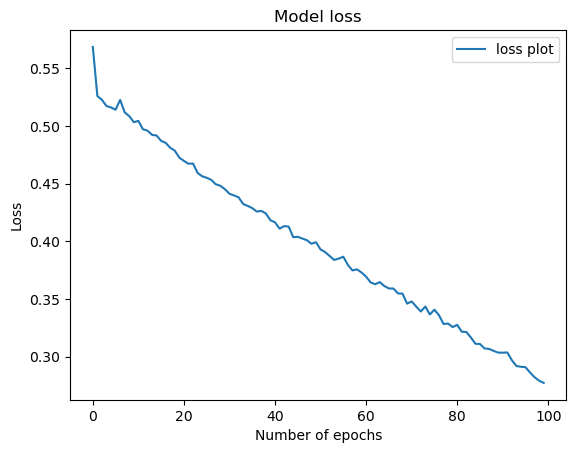

In [15]:
def visualize_model(history):
  #Lets visualize our model
  print(history.history.keys())
  # Lets plot the loss
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Number of epochs')
  plt.legend(['loss plot'], loc='upper right')
  plt.show()  

visualize_model(history)

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [16]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy =model.evaluate(x_test_scaled, y_test,)


# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

13/13 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7450
Loss: 0.5813134908676147, Accuracy: 0.7450000047683716


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [17]:
# Set the model's file path
keras_file_path = 'student_loans.keras'

# Export your model to a keras file
tf.keras.models.save_model(model, keras_file_path)

#Print saved model
print("Model saved to:", keras_file_path)


Model saved to: student_loans.keras


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [18]:
# Set the model's file path
keras_file_path = 'student_loans.keras'

# Load the model to a new object
loaded_model = tf.keras.models.load_model(keras_file_path)

### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [19]:
# Make predictions with the test data
y_pred = loaded_model.predict(x_test_scaled)


# Display a sample of the predictions
y_pred[:5]

13/13 [==============================] - 0s 1ms/step


array([[0.24023394],
       [0.46937963],
       [0.7283414 ],
       [0.7422718 ],
       [0.9907769 ]], dtype=float32)

In [20]:
# Save the predictions to a DataFrame and round the predictions to binary results
y_pred_binary = pd.DataFrame([0 if val < 0.5 else 1 for val in y_pred],columns=['Pred_value'])

y_pred_binary.value_counts()

Pred_value
1             212
0             188
Name: count, dtype: int64

### Step 4: Display a classification report with the y test data and predictions

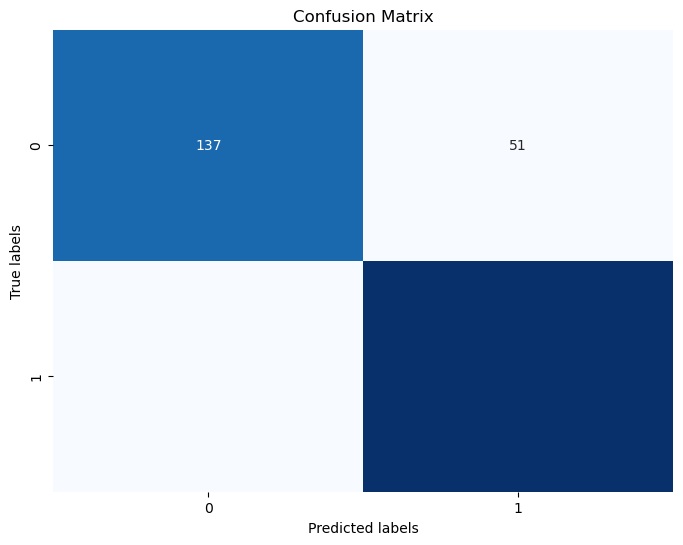

array([[137,  51],
       [ 51, 161]], dtype=int64)

In [22]:
# Print the classification report with the y test data and predictions
import seaborn as sns
cm = confusion_matrix(y_test,y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

cm

---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

**1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.**

Student Profile Data: This includes demographic information such as age, gender, location, educational background, academic performance, field of study, and income level. This data helps understand the individual's financial situation, academic standing, and career prospects, which are crucial factors in determining loan suitability.
Financial Information: Data related to income, expenses, assets, debts, credit score, and financial history provides insights into the student's financial health and creditworthiness. Lenders use this information to assess the student's ability to repay loans and determine loan terms and interest rates.
Loan Options and Terms: Information about various student loan products, including interest rates, repayment plans, loan amounts, eligibility criteria, and lender policies. This data helps match students with loans that best fit their financial needs and preferences.
User Interactions and Feedback: Data on user interactions, such as loan applications, clicks, views, and feedback, can provide valuable insights into user preferences, interests, and behaviors. This data can be used to personalize recommendations and improve the recommendation system's performance over time.


**2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.**

Context-Based Filtering: Contextual information such as the student's current academic status, field of study, income level, and employment prospects can influence loan recommendations. By considering the student's unique circumstances and financial needs, the recommendation system can offer more relevant and timely loan options.


**3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.**

Data Privacy and Security: Collecting and storing sensitive financial and personal information requires robust data privacy and security measures to protect user confidentiality and prevent unauthorized access or misuse of data. Compliance with regulations such as GDPR and CCPA is essential to ensure the ethical handling of user data.
Bias and Fairness: Recommendation systems may inadvertently introduce bias or discrimination in loan recommendations based on factors such as gender, race, or socioeconomic status. It's crucial to mitigate bias by ensuring fairness, transparency, and accountability in the recommendation process and regularly auditing and refining the algorithm to minimize any potential biases.

